# PCA and Logistic Regression

## Import Data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

In [40]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
df.shape

(284807, 31)

Text(0, 0.5, 'Frequency')

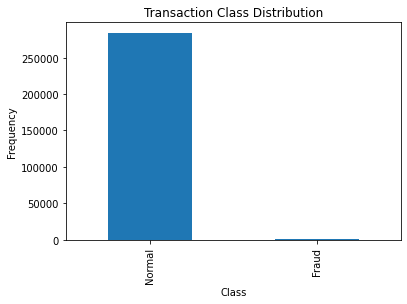

In [43]:
count_classes = pd.value_counts(df['Class'], sort = False)
count_classes.plot (kind='bar')
LABELS = ["Normal", "Fraud"]
plt.xticks(range(2), LABELS) 
plt.title ("Transaction Class Distribution")
plt.xlabel ("Class")
plt.ylabel ("Frequency")

## Data Preprocessing

In [44]:
df = df.drop (['Time', 'Amount'], axis = 1);

In [45]:
df.shape

(284807, 29)

In [46]:
# Null check
df.dropna(inplace=True)
(df.isnull().sum()).sort_values(ascending=False)

V1       0
V16      0
V28      0
V27      0
V26      0
V25      0
V24      0
V23      0
V22      0
V21      0
V20      0
V19      0
V18      0
V17      0
V15      0
V2       0
V14      0
V13      0
V12      0
V11      0
V10      0
V9       0
V8       0
V7       0
V6       0
V5       0
V4       0
V3       0
Class    0
dtype: int64

In [48]:
X = df.iloc[1:20000, :]
y = X.pop('Class')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [52]:
# fit
lr.fit(X_train,y_train)

LogisticRegression()

In [53]:
# Making predictions
predictions_lr = lr.predict(X_test)

In [54]:
# Let's check the report of our default model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.60      0.50      0.55        24

    accuracy                           1.00      6000
   macro avg       0.80      0.75      0.77      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

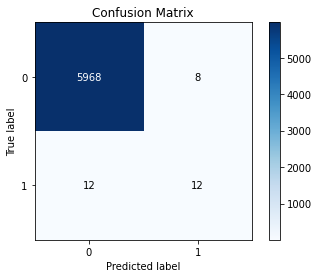

In [55]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_lr,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predictions_lr,labels=[0,1])


In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_test,predictions_lr))

Accuracy score: 0.9966666666666667


In [57]:
from sklearn.metrics import roc_auc_score
print('ROC Accuracy:', roc_auc_score(y_test,predictions_lr))

ROC Accuracy: 0.749330655957162


## PCA and Logistics Rgression

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [59]:
X_std.shape

(19999, 28)

Text(0, 0.5, 'Cumulative explained variance')

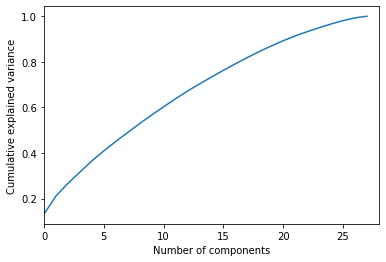

In [60]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,28,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

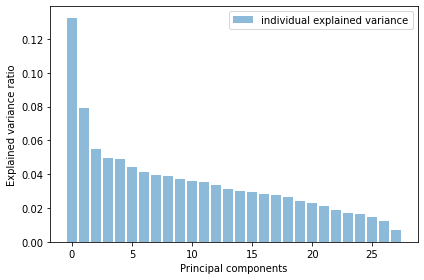

In [61]:
var_exp= pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.bar(range(28), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [62]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_std)

In [63]:
var_exp= pca.explained_variance_ratio_

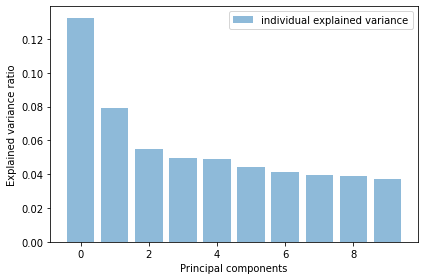

In [64]:
plt.figure(figsize=(6, 4))
plt.bar(range(10), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [65]:
X_pca.shape

(19999, 10)

In [67]:
X_pca

array([[ 0.07501053, -1.15695948,  0.40623828, ...,  0.6306732 ,
        -0.15742798,  0.97484687],
       [-0.02943768, -1.84635844, -1.17483317, ..., -1.20144823,
         0.01636111,  0.47903112],
       [-0.26777472, -1.19793327,  0.23758746, ..., -0.10921876,
        -0.95468832,  0.96731939],
       ...,
       [ 0.27409209, -1.30759971, -0.62849555, ..., -0.43127241,
        -0.61257855, -1.17382649],
       [-0.36812476, -2.18520179,  0.26011914, ...,  0.31406827,
         0.86313656, -0.19007722],
       [ 0.17463095, -1.00922301, -0.67059594, ..., -0.87706356,
        -0.91899132, -0.75282119]])

Text(0, 0.5, 'Second Principal Component')

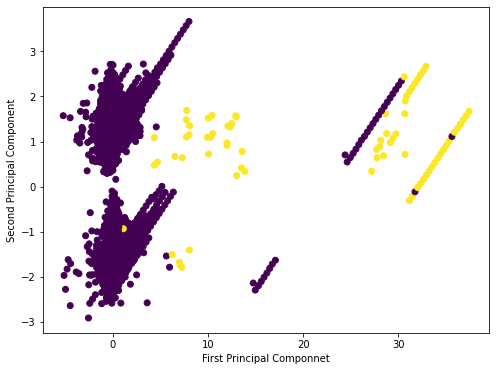

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('First Principal Componnet')
plt.ylabel('Second Principal Component')

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=101)

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

LogisticRegression()

In [72]:
# Making predictions
predictions_lr = lr.predict(X_test)

In [73]:
# Let's check the report of our default model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5976
           1       0.73      0.67      0.70        24

    accuracy                           1.00      6000
   macro avg       0.86      0.83      0.85      6000
weighted avg       1.00      1.00      1.00      6000



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

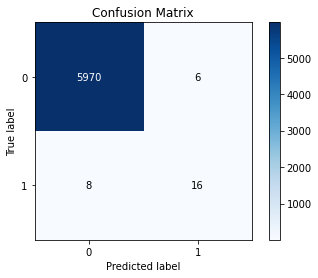

In [74]:
# Printing confusion matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test,predictions_lr,labels=[0, 1])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Fraud', 'Fraud'])
# disp.plot()

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predictions_lr,labels=[0,1])


In [75]:
from sklearn.metrics import accuracy_score
print('Accuracy score:',accuracy_score(y_test,predictions_lr))

Accuracy score: 0.9976666666666667


In [76]:
from sklearn.metrics import roc_auc_score
print('ROC Accuracy:', roc_auc_score(y_test,predictions_lr))

ROC Accuracy: 0.8328313253012047
